IPSOS data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from textwrap import wrap

In [6]:
data = pd.read_csv('CombinedData.csv')

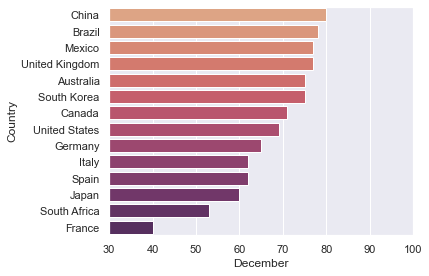

In [7]:
data = data.sort_values(by="December", ascending=False)
sns.barplot(data=data, y="Country", x= "December", palette='flare')
plt.tight_layout()
plt.xlim([30,100])
plt.show()
sns.set_theme(font="Arial")
sns.color_palette("husl", 8)
sns.color_palette("flare", as_cmap=True)


def getCountryInfo(countryID):
    return data[data["Country"]==countryID]

uk_data = getCountryInfo("United Kingdom")

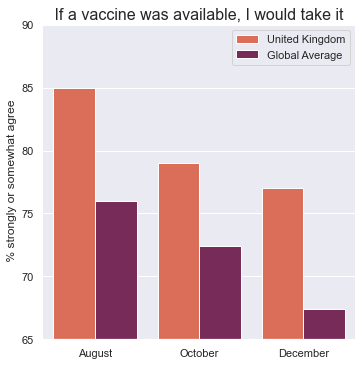

In [16]:
## Global Mean agreement append##
sns.set_theme(font="Arial")

au_mean = np.sum(data["August"]) / len(data["August"])
oct_mean = np.sum(data["October"]) / len(data["October"])
dec_mean = np.sum(data["December"]) / len(data["December"])

long_data = pd.melt(data, id_vars="Country", value_vars=["August","October","December"], \
    var_name="Month", value_name="Percentage agreement")


for month,val in zip(["August","October","December"], [au_mean,oct_mean,dec_mean]):
    long_data = long_data.append({
        'Country': "Global Average",
        'Percentage agreement': val,
        'Month': month
    }, ignore_index=True)


selectedRows = (long_data["Country"]=="United Kingdom") | (long_data["Country"] == "Global Average")
dataToPlot = long_data[selectedRows]

## Char Plot 

sns.set_theme(font="Arial")

g = sns.catplot(
    data=dataToPlot, kind="bar",
    x="Month", y="Percentage agreement", hue="Country",
    ci="sd", palette="rocket_r", legend=False
)
g.despine(left=True)
g.set_axis_labels("", " % strongly or somewhat agree")
#g.legend.set_title("")
plt.ylim([65,90])

plt.legend(loc='upper right')
plt.title(' If a vaccine was available, I would take it ', fontsize = 16)
plt.savefig('DecreaseOverMonths.svg', bbox_inches='tight')


In [17]:
uk_data

,Country,August,October,December
12,United Kingdom,85,79,77
